Code Developed by Mohammad Tami
------------------------------
> Arab American University <br>
> MSc Data Science

**Q:**
> **Given a finite directed graph and the goal node, find the path from the starting node to the goal node using: BFS, DFS, and UCS searching algorithms? and then identify the fastest searching algorithm with the lowest cost?**

In [ ]:
!pip install matplotlib

In [16]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx


class Graph:
    def __init__(self, edges, costs):
        self.edges = edges
        self.costs = costs
        self.graph_dict = {}
        for start, end in edges:
            if start not in self.graph_dict:
                self.graph_dict[start] = [end]
            else:
                self.graph_dict[start].append(end)

    def bfs(self, start, goal):
        visited = set()
        queue = deque([[start]])
        while queue:
            path = queue.popleft()
            node = path[-1]
            if node == goal:
                return path
            if node not in visited:
                visited.add(node)
                for neighbor in self.graph_dict.get(node, []):
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)

    def dfs(self, start, goal):
        visited = set()
        stack = [[start]]
        while stack:
            path = stack.pop()
            node = path[-1]
            if node == goal:
                return path
            if node not in visited:
                visited.add(node)
                for neighbor in self.graph_dict.get(node, []):
                    new_path = list(path)
                    new_path.append(neighbor)
                    stack.append(new_path)

    def ucs(self, start, goal):
        visited = set()
        queue = [(0, start, [])]

        while queue:
            cost, node, path = min(queue, key=lambda x: x[0])
            queue.remove((cost, node, path))

            if node == goal:
                return path + [node]

            if node not in visited:
                visited.add(node)
                for neighbor in self.graph_dict.get(node, []):
                    edge = (node, neighbor)
                    new_cost = cost + self.costs.get(edge, 1)
                    new_path = path + [node]
                    queue.append((new_cost, neighbor, new_path))

    def path_cost(self, path):
        return sum(self.costs.get((path[i], path[i + 1]), 1) for i in range(len(path) - 1))

    def plot(self):
        G = nx.DiGraph()
        for edge in self.edges:
            G.add_edge(edge[0], edge[1], weight=self.costs.get(edge, 1))

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=12, font_weight="bold", node_size=1500)

        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

        plt.axis("off")
        plt.show()


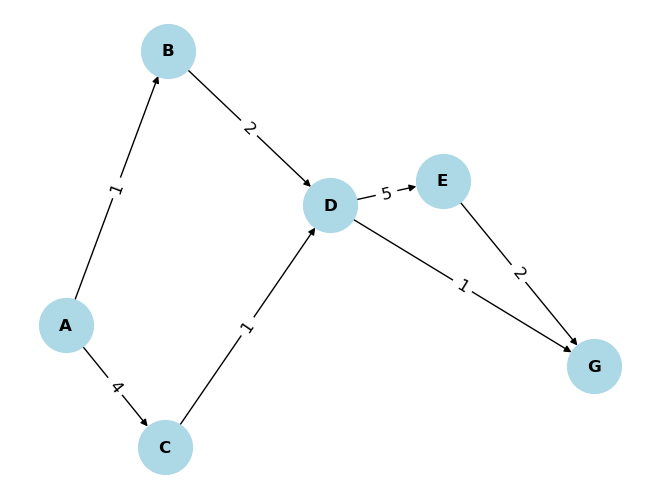

In [17]:
edges = [("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("D", "E"), ("E", "G"), ("D", "G")]
costs = {("A", "B"): 1, ("A", "C"): 4, ("B", "D"): 2, ("C", "D"): 1, ("D", "E"): 5, ("E", "G"): 2, ("D", "G"): 1}
g = Graph(edges, costs)
g.plot()

In [15]:
bfs_path = g.bfs("A", "G")
dfs_path = g.dfs("A", "G")
ucs_path = g.ucs("A", "G")

bfs_cost = g.path_cost(bfs_path)
dfs_cost = g.path_cost(dfs_path)
ucs_cost = g.path_cost(ucs_path)

print("BFS Path:", bfs_path, "Cost:", bfs_cost)
print("DFS Path:", dfs_path, "Cost:", dfs_cost)
print("UCS Path:", ucs_path, "Cost:", ucs_cost)

fast_algo = []
min_cost = min(bfs_cost, dfs_cost, ucs_cost)
if min_cost == bfs_cost:
    fast_algo.append('BFS')
if min_cost == dfs_cost:
    fast_algo.append('DFS')
if min_cost == ucs_cost:
    fast_algo.append('UCS')
   
print(f"\n{','.join(fast_algo)} {'are' if len(fast_algo)>1 else 'is'} the fastest algorithm with the lowest cost")


BFS Path: ['A', 'B', 'D', 'G'] Cost: 4
DFS Path: ['A', 'C', 'D', 'G'] Cost: 6
UCS Path: ['A', 'B', 'D', 'G'] Cost: 4

BFS,UCS are the fastest algorithm with the lowest cost


**Q:**
> **Given the initial and final/goal states of the 8-puzzle game, implement the A* search algorithm to find out the path from the start to the goal state? For example, see how the A* algorithm solves the following 8-puzzle problem:**
> 

In [31]:
import heapq

# The 8-puzzle game board is represented as a list of lists
# The empty space is represented as the integer 0
# For example, the starting state of the puzzle could be represented as [[1, 2, 3], [0, 4, 6], [7, 5, 8]]

# Function to calculate the Manhattan distance between two positions on the board
def manhattan_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return abs(x1 - x2) + abs(y1 - y2)

# Function to find the path from the start state to the goal state using A* search
def solve_8_puzzle(start_state, goal_state):
    # Define the possible moves that can be made in the game
    moves = {
        (0, 0): ['right', 'down'],
        (0, 1): ['left', 'right', 'down'],
        (0, 2): ['left', 'down'],
        (1, 0): ['up', 'right', 'down'],
        (1, 1): ['up', 'left', 'right', 'down'],
        (1, 2): ['up', 'left', 'down'],
        (2, 0): ['up', 'right'],
        (2, 1): ['up', 'left', 'right'],
        (2, 2): ['up', 'left']
    }
    
    # Define the priority queue for the A* search
    queue = []
    heapq.heappush(queue, (manhattan_distance(get_pos(start_state, 0), get_pos(goal_state, 0)), start_state, [], 0))
    
    # Define the set of explored states
    explored = set()
    
    while queue:
        # Get the state with the lowest cost from the priority queue
        _, state, path, cost = heapq.heappop(queue)
        
        # If the current state is the goal state, return the path to it
        if state == goal_state:
            return path
        
        # Add the current state to the set of explored states
        explored.add(tuple(map(tuple, state)))
        
        # Generate the possible next states
        for move in moves[get_pos(state, 0)]:
            new_state = [row[:] for row in state]
            empty_pos = get_pos(new_state, 0)
            next_pos = get_next_pos(empty_pos, move)
            new_state[empty_pos[0]][empty_pos[1]], new_state[next_pos[0]][next_pos[1]] = new_state[next_pos[0]][next_pos[1]], new_state[empty_pos[0]][empty_pos[1]]
            
            # If the new state has not been explored, calculate its cost and add it to the priority queue
            if tuple(map(tuple, new_state)) not in explored:
                new_path = path + [move]
                new_cost = cost + 1 + manhattan_distance(get_pos(new_state, 0), get_pos(goal_state, 0))
                heapq.heappush(queue, (new_cost, new_state, new_path, cost + 1))
    
    # If no path to the goal state is found, return None
    return None

# Function to get the position of a value on the board
def get_pos(board, value):
    for i, row in enumerate(board):
        for j, item in enumerate(row):
            if item == value:
                return (i, j)

# Function to get the next position on the board based on a move
def get_next_pos(pos, move):
    if move == 'up':
        return (pos[0] - 1, pos[1])
    elif move == 'down':
        return (pos[0] + 1, pos[1])
    elif move == 'left':
        return (pos[0], pos[1] - 1)
    elif move == 'right':
        return (pos[0], pos[1] + 1)
    else:
        raise ValueError('Invalid move')

In [30]:
start_state = [[1, 2, 3], [0, 4, 6], [7, 5, 8]]
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
path = solve_8_puzzle(start_state, goal_state)
if path:
    print(path)
else:
    print('No path found')

['right', 'down', 'right']
